# # Introduzione ai classificatori

Nel seguente programma introduciamo i passi base della classificazione degli esempi di un dataset rappresentato come una matrice

Importiamo il package per l'apprendimento degli alberi

In [3]:
from sklearn import tree 

Definiamo la matrice con i dati (un esempio per riga)
e il vettore con il corrispondente valore della variabile target 

In [4]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Dichiariamo il modello di classificazione che vogliamo usare e poi lo adattiamo (fit) ai dati

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Prediciamo il valore della variabile target (e lo visualizziamo) per i dati passati, e usiamo il modello 'fittato' in clf

In [6]:
print(clf.predict([[0, 1, 1]]))

[0]


Visualizziamo l'albero appreso. 

---
Prima importiamo la libreria per la visualizzazione dei grafi (graphviz).
Poi esportiamo il classificatore in clf in una variabile che contiene la sua descrizione nel linguaggio dot.

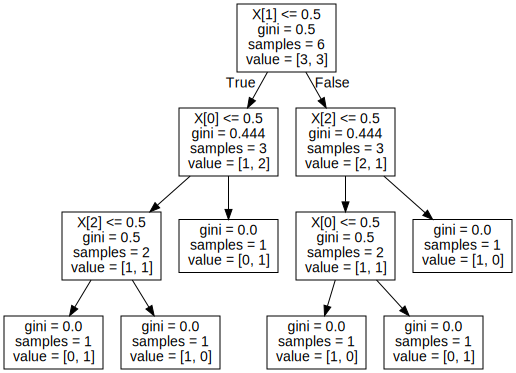

In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Nel seguito usiamo il dataset Iris (dall'archivio dell'Università della California di Irvine (UCI) di Machine Learning)

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

# Dichiariamo il tipo del modello predittivo e i parametri dell'apprendimento dell'algoritmo di induzione del modello ad albero

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Dividiamo il dataset in training e test set

In [10]:
# Generiamo una permutazione casuale degli indici degli esempiche verranno usati per il training e il test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

# Fittiamo il modello sul training set

In [11]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Otteniamo le predizioni

In [12]:
# applichiamo il modello fittato in "clf" al test set 
predicted_y_test = clf.predict(iris_X_test)

# visualizziamo le predizioni (gli indici delle classi associati ai nomi delle classi in target_names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Visualizza l'indice delle instanze di test e le corrispondenti predizioni

In [13]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Vediamo alcuni esempi

In [14]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Otteniamo i risultati delle predizioni (model performance results)

In [15]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Usiamo la Cross Validation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
print("Media cross validation:", np.mean(scores))

[0.96666667 1.         0.86666667 0.86666667 1.        ]
Media cross validation: 0.9400000000000001


In [17]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Mostriamo l'albero risultante 

## 1. Visualizza la figura dell'albero in un file PDF

In [18]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Genera la figura

In [19]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


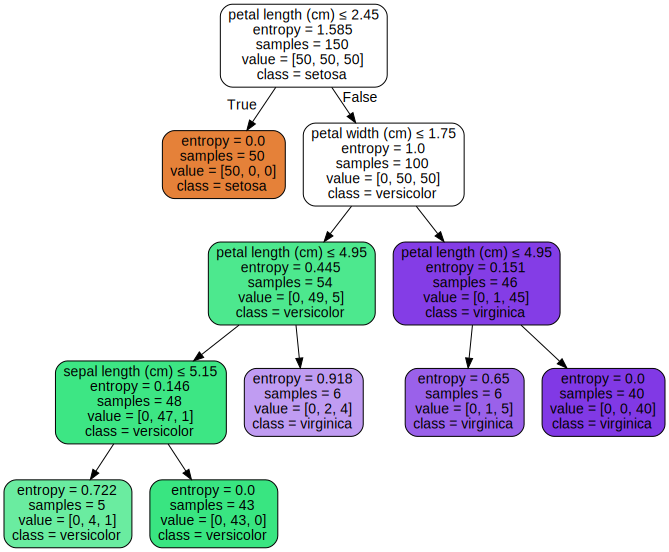

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Esercizi

In [27]:
import graphviz
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt

## 1.A Sovracampionamento
applicate un sovracampionamento (artificial inflation) ad una classe nel training set con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni.



Dimensione iniziali dataset:  150 150
Dimensione iniziali fetures per virginica:  50
Dimensione nuove fetures per virginica:  450
Dimensione nuovi target per virginica:  450
Dimensione nuovo dataset:  600 600
[0.96666667 0.98333333 0.98333333 0.95833333 0.975     ]
Media cross validation: 0.9733333333333333


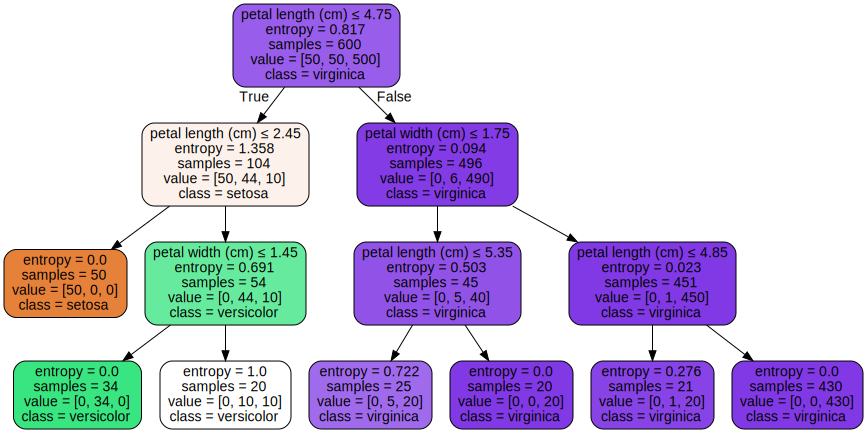

In [21]:
#L'idea è qeulla di prendere degli esempi di 2 classi (virginica o versicolor) e aggiungere esempi al dataset
#Scelgo virginica classe 2

iris = load_iris()
print("Dimensione iniziali dataset: ",len(iris.data),len(iris.target))
print("Dimensione iniziali fetures per virginica: ",len(iris.data[iris.target == 2]))

#Prendo la classe virginica e ripeto 9 volte tutti gli esempi nel dataset cosi da avere un peso 10, passando da len(iris.data[iris.target == 2])) == 50 a  len(new_features_virginica) == 500
#Queste sono le mie x
new_features_virginica = np.repeat(iris.data[iris.target == 2],9, axis = 0)

print("Dimensione nuove fetures per virginica: ",len(new_features_virginica))

#Prendo la classe virginica e costruisco una matrice di dimensione pari a len(new_features_virginica) di target cioè 2
#Queste sono le mie y
new_target_virginica = np.ones(len(new_features_virginica))+1

print("Dimensione nuovi target per virginica: ",len(new_target_virginica))

#Mi creo il nuvo dataset
iris_new_X = np.concatenate((iris.data,new_features_virginica),axis=0)
iris_new_y = np.concatenate((iris.target,new_target_virginica),axis=0)

print("Dimensione nuovo dataset: ",len(iris_new_X),len(iris_new_y))

np.random.seed(0)
random_indices = np.random.permutation(len(iris_new_X))

iris_new_X = iris_new_X[random_indices] # ordina i dati in modo casuale
iris_new_y = iris_new_y[random_indices] # ordina i dati in modo casuale

inf_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=18, class_weight={0:1,1:1,2:1})
inf_clf = inf_clf.fit(iris_new_X, iris_new_y) #Faccio il fit

#Calcolo la cross validation
scores = cross_val_score(inf_clf, iris_new_X, iris_new_y, cv=5)
print(scores)
print("Media cross validation:", np.mean(scores))


#Mostro il Graph tree
graph_tree = tree.export_graphviz(inf_clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph



## 1.B Nuovi Pesi
modifcare i pesi della stessa classe (si metta a 10 il peso per l'errata predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda  l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.




[0.96666667 0.86666667 0.96666667 0.93333333 0.96666667]
Media cross validation: 0.9400000000000001


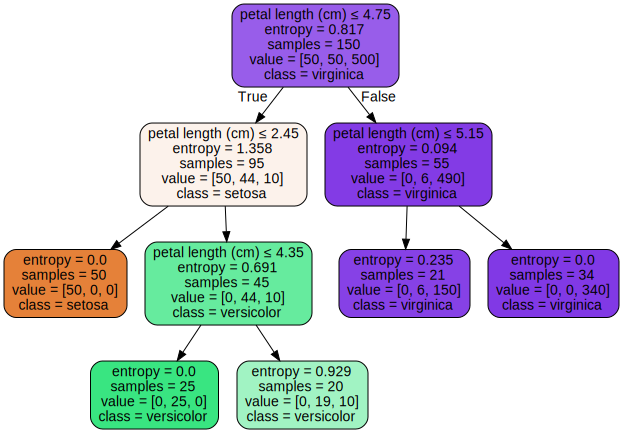

In [22]:
#Scelgo virginica classe 2

np.random.seed(10)
random_indices = np.random.permutation(len(iris.data))

iris_new_X = iris.data[random_indices]
iris_new_y = iris.target[random_indices]

# modifico i pesi sempre di 
w_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=18, class_weight={0:1,1:1,2:10})
w_clf = w_clf.fit(iris_new_X, iris_new_y)

#Calcolo la cross validation
scores = cross_val_score(inf_clf, iris_new_X, iris_new_y, cv=5)
print(scores)
print("Media cross validation:", np.mean(scores))

graph_tree = tree.export_graphviz(w_clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

## 2 Evitare Overfitting
si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set) facendo 'tuning' degli iper-parametri: il minimo numero dei campioni per foglia, la massima profondità dell'albero, i parametri di minomo decremento dell'impurezza, massimo numero dei nodi foglia, ecc.

In [23]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

indices_training=indices[:-75]
indices_test=indices[-75:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test]
iris_y_test  = iris.target[indices_test]

print(len(iris_X_train),len(iris_X_test))

75 75


In [24]:
clfs = [] # Lista dei classificatori
accs = [] # Lista delle accuratezze
cv = []   # Lista della cross-validation

# Costruiamo sei classificatori, ciascuno con una configurazione differente di hyper-parameters
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300) ) # default
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16)) # min_samples_leaf=16
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16, max_leaf_nodes=4)) # max_leaf_nodes=4
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16, max_leaf_nodes=4, max_depth=2)) # max_depth=2
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_split=30)) # min_samples_split=30
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_impurity_decrease=0.44)) # min_impurity_decrease=0.44

# Avviamo la cross-validation su tutti i classificatori
for clf in clfs:
  cv.append(cross_val_score(clf, iris.data, iris.target, cv=10).mean()) # 10-fold cross validation (di cui faccio la media)
  clf = clf.fit(iris_X_train, iris_y_train)
  predicted_y_test = clf.predict(iris_X_test)
  accs.append(accuracy_score(iris_y_test, predicted_y_test))

print("Accuratezze per classificatore:" + str(accs))
print("Media della cross-validation per class.:" + str(cv))

Accuratezze per classificatore:[0.96, 0.96, 0.96, 0.96, 0.9733333333333334, 0.96]
Media della cross-validation per class.:[0.96, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.96, 0.9466666666666667]


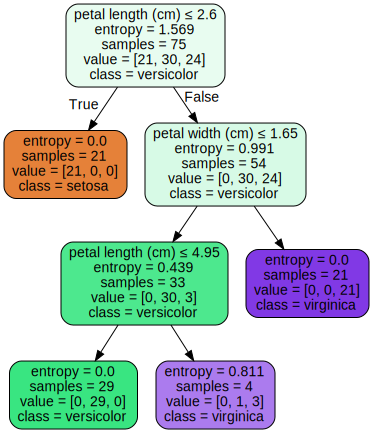

In [25]:
graph_tree = tree.export_graphviz(clfs[4], out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

## 3 Matrice di confusione
si costruisca la matrice di confusione dell'albero creato  sul test set e la si visualizzi.

In [28]:
for i in range(len(clfs)):
  print(confusion_matrix(iris_y_test,clfs[i].predict(iris_X_test)))
  print("--------------")

[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  0 26]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------


## 4 Roc Curves
si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva): per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a turno la classe positiva.



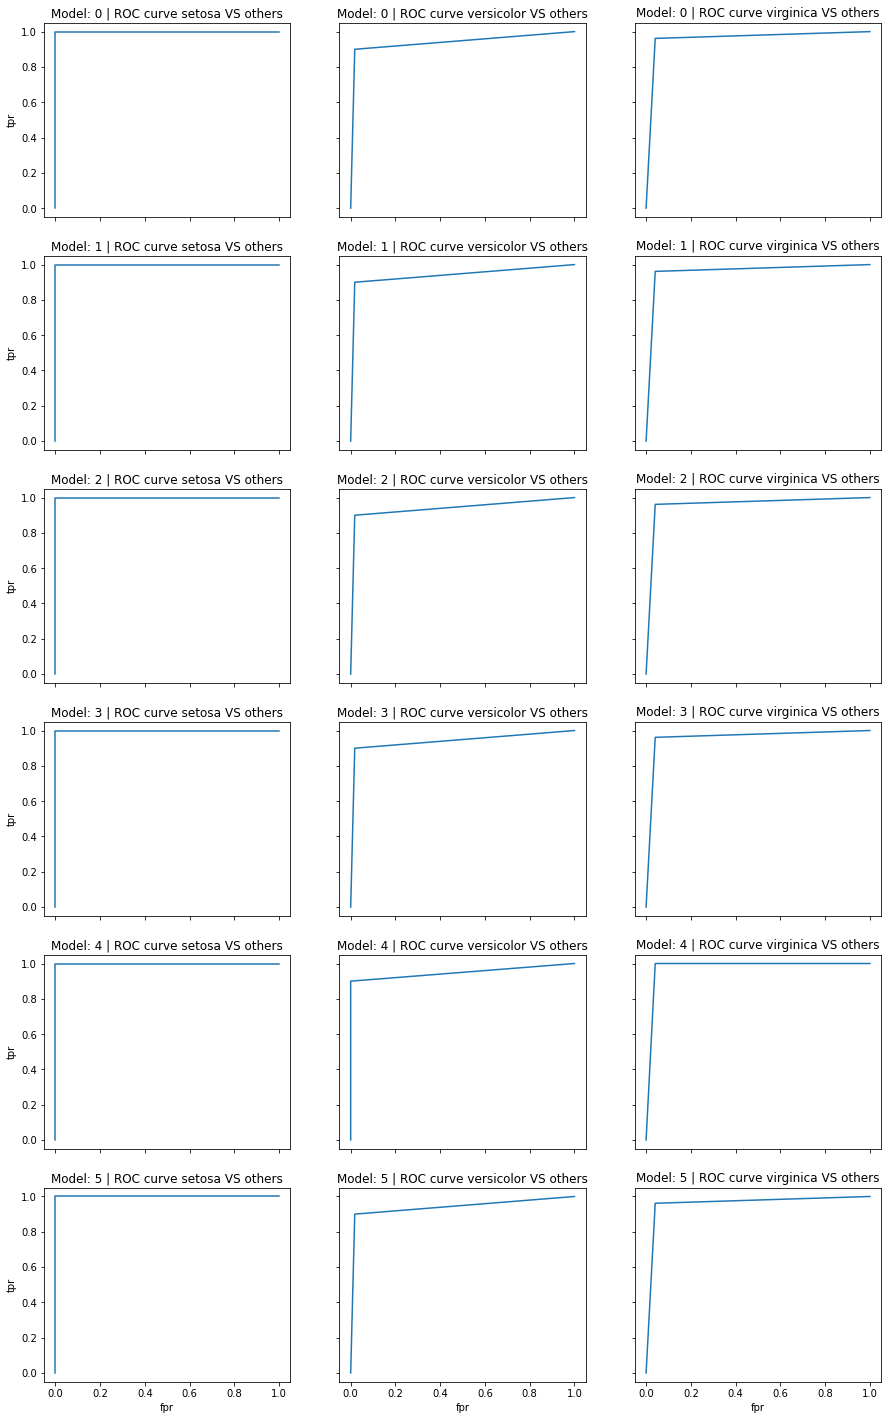

In [29]:
# 1 classe +
# -1 classe -

fig, axs = plt.subplots(len(clfs),3,figsize=(15,25))

for i in range(len(clfs)):
  for j in range(3):
    predictions = clfs[i].predict(iris_X_test)
    fpr, tpr, _ = roc_curve(np.where(iris_y_test==j, 1, -1), np.where(predictions==j, 1, -1))
    axs[i,j].plot(fpr, tpr)
    axs[i,j].set_title(f'Model: {i} | ROC curve {iris.target_names[j]} VS others')

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.show()